# Treinamento SVM

### Instalação de Requirements

In [ ]:
! pip install -U scikit-learn
! pip install matplotlib
! pip install pyarrow
! pip install fastparquet

## Bibliotecas que devem ser importadas

Pandas para manipulação de dados, SVC para construir o modelo de classificação, além de diversos métodos do scikit-learn para avaliação do modelo.

In [15]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Carregar e Balancear o Conjunto de Dados

In [6]:
df = pd.read_parquet("../data/processed/sim_2006_2017_pre_processed.parquet")

In [7]:
suicidio_0 = df[df['SUICIDIO'] == 0]
suicidio_1 = df[df['SUICIDIO'] == 1]

suicidio_0_sample = suicidio_0.sample(n=len(suicidio_1), replace=False)
balanced_df = pd.concat([suicidio_0_sample, suicidio_1], ignore_index=True).reset_index(drop=True)

## Preparar Dados para Treinamento

Características e variável alvo do DataFrame balanceado são selecionadas, seguido pela divisão dos dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo posteriormente.

In [8]:
X = balanced_df[['ESC', 'ESTCIV', 'IDADE' ,    'NATURAL' ,    'OCUP',    'RACACOR'    ,'MASCULINO',    'FEMININO'    ]].values
y = balanced_df['SUICIDIO'].values

### Divisão entre teste e treino


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Support Vector Machine

O Support Vector Machine (SVM) é um modelo de aprendizado de máquina amplamente usado para classificação reconhecido pela sua eficácia em encontrar a melhor divisão linear entre categorias de dados
Têm capacidade de maximizar a separação entre classes, proporcionando um modelo robusto e eficiente para problemas de classificação.

In [10]:
modelo_svm = SVC(kernel="rbf")
modelo_svm.fit(X, y)

SVC()

### Realizar previsões com o Modelo

In [11]:
y_pred = modelo_svm.predict(X_test)

## Avaliar o Modelo

In [12]:
print("Relatório de Classificação SVM: \n",
      classification_report(y_test, y_pred))
print("Matriz de Confusão do SVM:\n", confusion_matrix(y_test, y_pred))

Relatório de Classificação SVM: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      4745
           1       0.77      0.80      0.79      4688

    accuracy                           0.79      9433
   macro avg       0.79      0.79      0.78      9433
weighted avg       0.79      0.79      0.78      9433

Matriz de Confusão do SVM:
 [[3651 1094]
 [ 934 3754]]


## Visualização dos dados

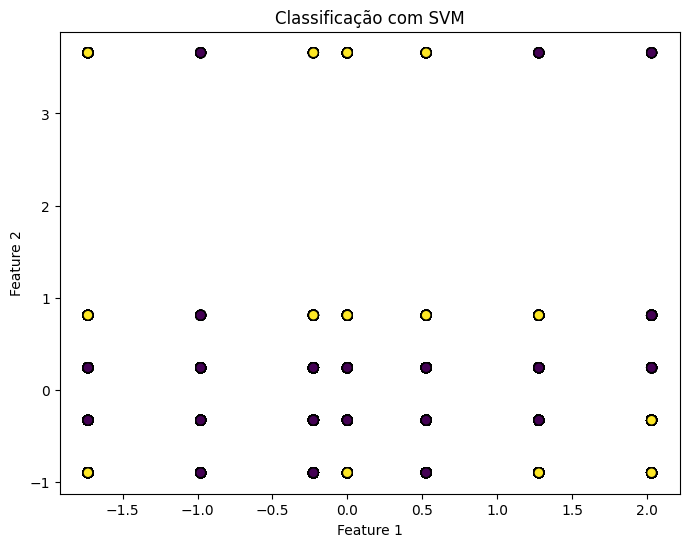

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred,cmap='viridis', edgecolors='black', s=50)
plt.title("Classificação com SVM")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
geovanna = pd.DataFrame({'ESC': 5,    'ESTCIV': 1,    'IDADE': 22,    'NATURAL': 53,    'OCUP': -1,    'RACACOR': 4,    'MASCULINO': False,    'FEMININO': True}, index=[0])

arthur = pd.DataFrame({'ESC': 5,    'ESTCIV': 1,    'IDADE': 21,    'NATURAL': 52,    'OCUP': -1,    'RACACOR': 1,    'MASCULINO': True,    'FEMININO': False}, index=[0])



doug = pd.DataFrame({'ESC': 4,    'ESTCIV': 2,    'IDADE': 34,    'NATURAL': 29,    'OCUP': 5132,    'RACACOR': 4,    'MASCULINO': True,    'FEMININO': False}, index=[0])



cozinheiro = pd.DataFrame({'ESC': 4,    'ESTCIV': 2,    'IDADE': 34,    'NATURAL': 29,    'OCUP': 5132,    'RACACOR': 4,    'MASCULINO': True,    'FEMININO': False}, index=[0])

In [17]:
teste = pd.concat((geovanna, arthur, doug, cozinheiro), ignore_index=True)

std = StandardScaler()
columns = ['ESC', 'ESTCIV', 'IDADE', 'OCUP', 'RACACOR']
teste[columns] = std.fit_transform(teste[columns])
x = teste[['ESC', 'ESTCIV', 'IDADE', 'NATURAL', 'OCUP', 'RACACOR', 'MASCULINO', 'FEMININO']].values

In [18]:
y_pred = modelo_svm.predict(x)
y_pred

array([1, 1, 0, 0])